In [ ]:
!pip install "gluonts[torch]"
!pip install orjson

# 30s

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# 7s

In [3]:
# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

In [ ]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12,
    freq="M",
    trainer_kwargs={"max_epochs": 5}
).train(training_data)

# 13s

In [5]:
forecasts = list(model.predict(test_data.input))

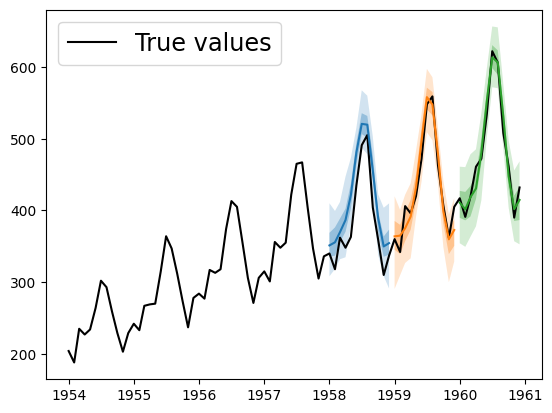

In [6]:
# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")